Sebastian Yepes Acevedo

Cc:1007448816

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

In [6]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

Cargamos el dataset "Iris" y dividimos los datos en conjuntos de entrenamiento y de prieba para evaluar el rendimiento del modelo.

In [7]:
clf = DecisionTreeClassifier(random_state=42)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Exactitud (accuracy):", acc)

Exactitud (accuracy): 1.0


Aplicamos el calisficador de arbol para obtener predicciones de prueba y calcuclar la exactitud del modelo por medio del score.

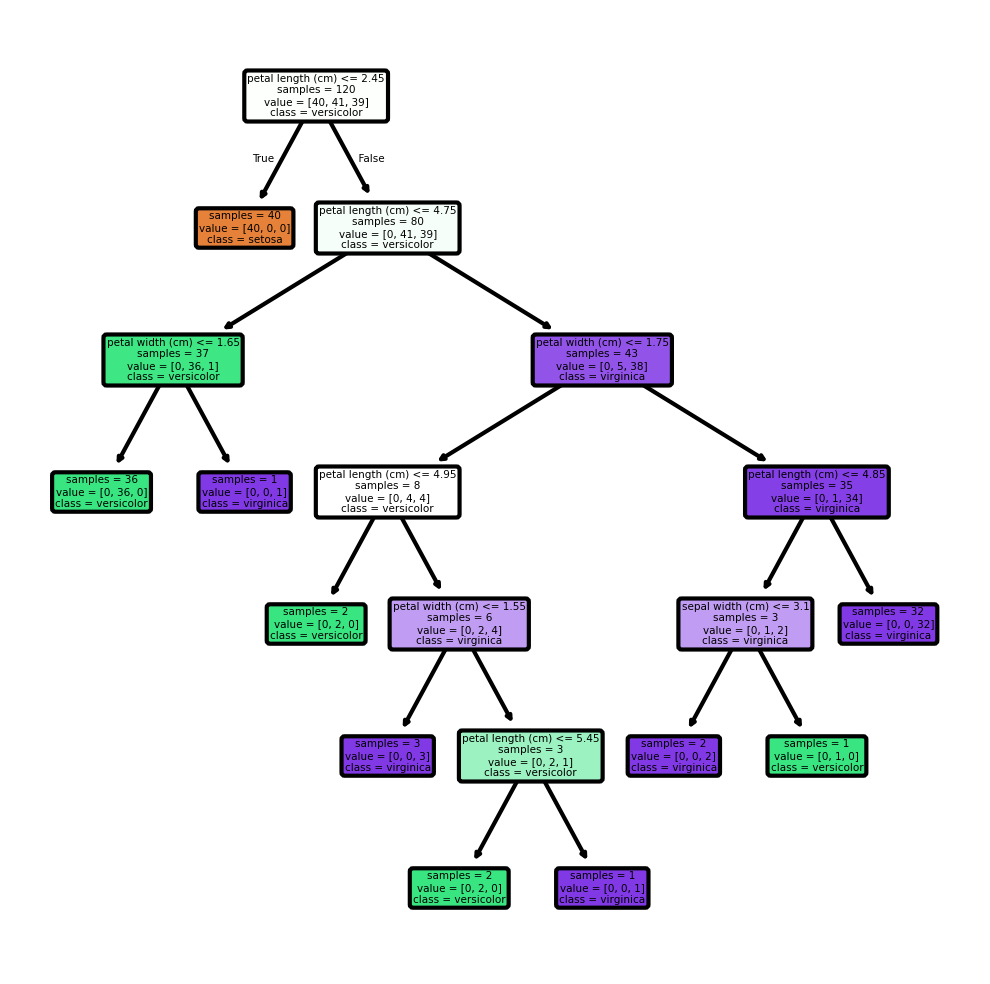

In [11]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
graph=tree.plot_tree(clf,class_names = iris.target_names,\
                feature_names = iris.feature_names,\
                impurity=False, filled=True,rounded=True )

Podemos identificar en el gráfico un modelo que divide los datos con base a sus atributos.

Se pueden ver la clasificación de las ramas según su tipo y los valores. Se compara entonces el largo del pétalo en la primera decisión y de la misma manera con las demás plantas.

La setosa se separó solamente con el largo del pétalo, mientras que el versicolor y la virginica se separan con base al largo, pero también el ancho del petalo entre otros debido a sus características solapadas.

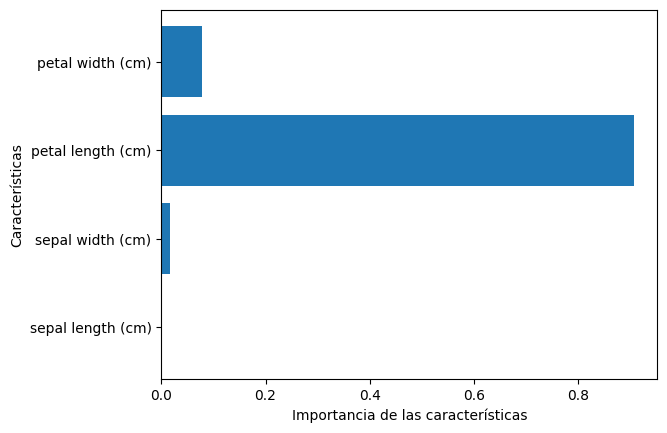

In [14]:
clf.feature_importances_
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

Tal como se esperaba, la importancia en la clasificación es mucho mayor para el largo del pétalo.

/tmp/ipython-input-3959247898.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-3959247898.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-3959247898.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-3959247898.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-3959247898.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


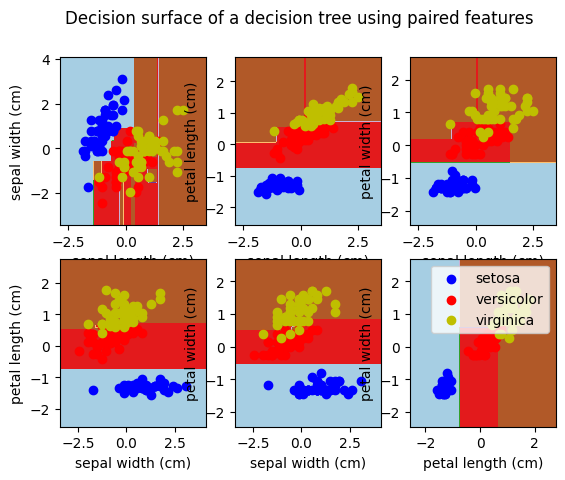

In [15]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

En las gráficas podemos observar en solapamiento de los datos de las clases setosa y virginica, mientras que para el caso de la setosa, basta con la longitud del petalo para su clasificación. Las combinaciones mas claras llegan a ser las que se relacionan con la longitud de los petalos, notandose más en el ultimo gráfico donde hay menos solapamiento.